In [9]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import matplotlib.pyplot as plt

In [10]:
# open TTEs file as a list to merge at the end
tte_merge=[]

for i in range (9):
    n_i=TTE.open('bn130427324/glg_tte_n'+str(i)+'_bn130427324_v00.fit')
    tte_merge.append(n_i)

In [11]:
# print the metadata in the PRIMARY header
tte=TTE.merge(tte_merge, force_unique=True)
tte.headers['PRIMARY']

CREATOR = 'GBM Data Tools 1.1.1 Software and version creating file'             
FILETYPE= 'GBM PHOTON LIST'    / Name for this type of FITS file                
FILE-VER= '1.0.0   '           / Version of the format for this filetype        
TELESCOP= 'GLAST   '           / Name of mission/satellite                      
INSTRUME= 'GBM     '           / Specific instrument used for observation       
DETNAM  = 'NAI_00  '           / Individual detector name                       
OBSERVER= 'Meegan  '           / GLAST Burst Monitor P.I.                       
ORIGIN  = 'GIOC    '           / Name of organization making file               
DATE    = '2023-02-01T13:19:58' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
DATE-OBS= '2013-04-27T07:44:50' / Date of start of observation                  
DATE-END= '2013-04-27T07:55:04' / Date of end of observation                    
TIMESYS = 'TT      '           / Time system used in time keywords              
TIMEUNIT= 's       '        

In [12]:
# bin to 1.024 s resolution, reference time is trigger time
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)
%matplotlib inline

In [13]:
from gbm.plot import Lightcurve, Spectrum
erange = (50.0, 300.0)
time_split = (-20.0, 300.0)
lc_data = phaii.to_lightcurve(time_range=time_split,energy_range=erange)
#lcplot = Lightcurve(data=lc_data)

In [14]:
#BKG extimation
bkgd_times = [(-20.0, 0.0) , (21.0 , 300.0)]
# the background fitter interface
from gbm.background import BackgroundFitter
# our fitting algorithm
from gbm.background.binned import Polynomial
# we initialize our background fitter with the phaii object, the algorithm, and the time ranges to fit.
# if we were using an unbinned algorithm, we'd call .from_tte() and give it tte instead of phaii
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, time_ranges=bkgd_times)

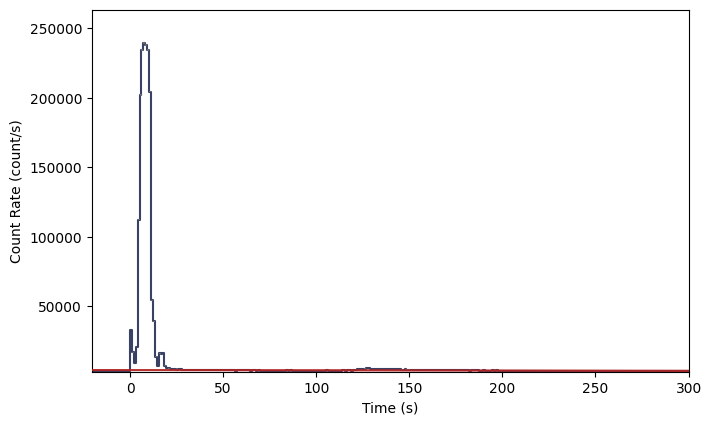

In [17]:
# and once initialized, we can run the fit with the fitting parameters appropriate for our algorithm.
# here, we'll do a 1st order polynomial
backfitter.fit(order=1)
#backfitter.statistic/backfitter.dof
bkgd = backfitter.interpolate_bins(phaii.data.tstart, phaii.data.tstop)
#type(bkgd)
lc_bkgd = bkgd.integrate_energy(*erange)
lcplot = Lightcurve(data=lc_data, background=lc_bkgd)
plt.show()